# Overview of **SlideRule** Functionality

[SlideRule](https://slideruleearth.io/web/) is a web service that provides on-demand customized data products.  The primary way of accessing SlideRule is through its Python client.

```{admonition} Quick links
* SlideRule Documentation: https://slideruleearth.io/web/
* SlideRule GitHub Repository: https://github.com/ICESat2-SlideRule/sliderule
* SlideRule Python Examples GitHub Repository: https://github.com/ICESat2-SlideRule/sliderule-python
```

This notebook gives an overview of the different functionality SlideRule provides.

```{admonition} Learning Objectives
* How to import and configure the SlideRule Python client
* Survey SlideRule's core and advanced functionality
* Where to find documentation on SlideRule's APIs
```

## I. Import and Configure SlideRule

The SlideRule Python client currently consists of seven primary modules.

* __sliderule__ - the core module
* __earthdata__ - functions that access CMR (NASA's Common Metadata Repository), CMR-STAC, and TNM (The National Map, for the 3DEP data hosted by USGS)
* __h5__ - APIs for directly reading HDF5 and NetCD4 data
* __raster__ - APIs for sampling supported raster datasets
* __icesat2__ - APIs for processing ICESat-2 data
* __gedi__ - APIs for processing GEDI data
* __io__ - functions for reading and writing local files with SlideRule results
* __ipysliderule__ - functions for building interactive Jupyter notebooks that interface to SlideRule

These modules can be imported into your environment like so:

In [1]:
from sliderule import sliderule, earthdata, h5, raster, icesat2, gedi

Once those modules are imported, the next thing you'll likely want to do is configure the client with the settings you want to use.  That is done with a call to `sliderule.init()`.  For detailed documentation on what arguments are supported by the initialization function, check out the [api reference page](https://slideruleearth.io/web/rtd/api_reference/sliderule.html#init).

It is not necessary to call `sliderule.init()` in order to start using the client, since the default settings provide a working system.  Nevertheless, it is a good practice to include a call to this function early in your notebook as a placeholder for when different settings are desired.  For instance, if you want to change the verbosity of the client and enable logging to the console, you can do so as shown below.

In [3]:
sliderule.init(verbose=True)

## II. Core Functionality
- A. [Directly read HDF5 and NetCDF4 files](#h5p)
- B. [Subset ATL03 photon cloud data](#atl03sp)
- C. [Generate customized ATL06 elevations](#atl06p)
- D. [Generate customized ATL06 elevations using ATL08 classifications](#atl08)
- E. [Generate customized ATL08 vegetation metrics](#phoreal)
- F. [Sample rasters at points of interest](#raster)
- G. [Subset GEDI L1B, L2A, L4A](#gedi)

<a id='h5p'></a>
### A. Directly read HDF5 and NetCDF files

The **h5** module provides APIs for directly reading HDF5 and NetCDF4 files hosted by NASA in the cloud. [`h5.h5p`](https://slideruleearth.io/web/rtd/api_reference/h5.html#h5p) is the primary method used to directly read data in the cloud.  The [reference page](https://slideruleearth.io/web/rtd/api_reference/h5.html#h5p) for `h5.h5p` provides a description of each of the arguments needed to make the call and the different options available.  


```{tip}
Under-the-hood, the functions in the **h5** module make HTTP requests to SlideRule servers running in us-west-2, and those servers read the requested data from S3 and return the results in an HTTP response back to the client.
```

In the example below, the first 10 latitudes and longitudes are read from an ATL06 granule.  The results are returned in a dictionary of numpy arrays, where each key is the name of the dataset.  If instead of reading just the first 10 values, all the values need to be read, then "numrows" can be set to `h5.ALL_ROWS`. 

In [3]:
asset = "icesat2"
resource="ATL06_20181017222812_02950102_006_02.h5"
datasets = [
    # latitudes
    {"dataset": "/gt1l/land_ice_segments/latitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt1r/land_ice_segments/latitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt2l/land_ice_segments/latitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt2r/land_ice_segments/latitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt3l/land_ice_segments/latitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt3r/land_ice_segments/latitude", "startrow": 0, "numrows": 10},
    # longitudes
    {"dataset": "/gt1l/land_ice_segments/longitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt1r/land_ice_segments/longitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt2l/land_ice_segments/longitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt2r/land_ice_segments/longitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt3l/land_ice_segments/longitude", "startrow": 0, "numrows": 10},
    {"dataset": "/gt3r/land_ice_segments/longitude", "startrow": 0, "numrows": 10}
]

atl06 = h5.h5p(datasets, resource, asset)

In [4]:
atl06

{'/gt3l/land_ice_segments/longitude': array([-106.92358939, -106.92360831, -106.92362694, -106.92364578,
        -106.92366553, -106.92368548, -106.92370511, -106.92372443,
        -106.92374335, -106.92376208]),
 '/gt3r/land_ice_segments/longitude': array([-106.92284566, -106.92286519, -106.92288437, -106.92290365,
        -106.9229221 , -106.92294135, -106.92296191, -106.92298185,
        -106.92300157, -106.9230211 ]),
 '/gt3r/land_ice_segments/latitude': array([27.00538841, 27.00557226, 27.00575378, 27.00593394, 27.00611417,
        27.00629433, 27.00647438, 27.00665448, 27.00683461, 27.00701475]),
 '/gt3l/land_ice_segments/latitude': array([27.00532861, 27.00550881, 27.00568902, 27.00586922, 27.00604934,
        27.00622944, 27.00640957, 27.00658973, 27.00676992, 27.00695013]),
 '/gt1l/land_ice_segments/latitude': array([26.99974882, 26.99993919, 27.00011936, 27.0002995 , 27.00047959,
        27.00065967, 27.00083975, 27.00101983, 27.00119991, 27.00138   ]),
 '/gt1r/land_ice_segme

<a id='atl03sp'></a>
### B. Subset ATL03 photon cloud data

The [`icesat2.atl03sp`](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl03sp) function makes an ATL03 subsetting request to SlideRule servers and returns a GeoDataFrame of photons.  Documentation for this function can be found in the [API reference](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl03sp).

In the example below, a set of resources is specified via the `poly`, `rgt`, and `cycle` parameters.  Because each granule contains so many photons, it is necessary when making this call to limit the area over which the subsetting request is made, along with the number of granules inside that area. By supplying a GeoJSON file (which is read and processed by the `sliderule.toregion` function into a format usable by SlideRule), the extent of data read in each granule is trimmed.  By supplying a reference ground track (`rgt`), and the cycle number, the number of granules is reduced - in this case to a single granule.

The other parameters in the request are used to specify different aspects of the ATL03 subsetting request.  The `srt` parameters specifies the surface type, which in this case is land. The surface type is used in conjunction with the next parameter - `cnf` which is the confidence level.  A confindence level of high tells SlideRule to only include photons that are highly likely to be surface reflections off of land.  (As a different example, if the `srt` parameter specified land ice and the confidence level was low, then SlideRule would include all photons that had *at least* a low likelihood of being a reflection off of land ice). Lastly, the `len` and `res` parameters specify the length and resolution of the photon segments being returned.  In this case we are asking for 20m segments of photons every 20m.  The length and step size of the segment does not matter so much if it is only photons being returned, but when other processing parameters are supplied (like minimal along track spread of a segment), then it matters more.

Lastly, the call to `icesat2.atl03sp` is made which sends the HTTP request to SlideRule's servers and then waits and accumulates the response from the servers into a GeoDataFrame, with each row representing a single photon.

```{tip}
For the request below there are only ~1K photons returned.  In the actual data, there are roughly ~300K high-confidence photons inside the Grand Mesa region in the selected granule.  The reason so few photons are returned is because the length of the segment is set to 20m and the default along-track-spread required for a valid segment is also 20m (because the default segment length is 40m).  As a result, most segments are filtered out by SlideRule as not being valid.  This happens all the time to me - I get back a lot less data than I expected because I inadvertently changed one parameter without changing another parameter related to it.  In this case, the way to get all of the photons would be to either change the along-track-spread to 40m ("ats": 40), or tell SlideRule to return invalid segments ("pass_invalid": True).  I left it this way below because I wanted to highlight this common issue, and also because the smaller datasets is faster to load into a GeoDataFrame. 
```


In [5]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build ATL03 Subsetting Request Parameters
parms = {
    "poly": region["poly"],
    "rgt": 737,
    "cycle": 16,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "len": 20.0,
    "res": 20.0
}

# Make ATL03 Subsetting Request
atl03 = icesat2.atl03sp(parms)

INFO:sliderule.earthdata:Identified 1 resources to process
INFO:sliderule.sliderule:request <AppServer.370> processing initialized on ATL03_20220809040157_07371602_006_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.370> processing of ATL03_20220809040157_07371602_006_01.h5 complete (691371/5361/0)
INFO:sliderule.sliderule:Successfully completed processing resource [1 out of 1]: ATL03_20220809040157_07371602_006_01.h5


In [6]:
atl03

,sc_orient,background_rate,rgt,cycle,segment_dist,track,segment_id,solar_elevation,atl03_cnf,relief,yapc_score,quality_ph,snowcover,atl08_class,distance,landcover,height,pair,geometry,spot
time,,,,,,,,,,,,,,,,,,,,
2022-08-09 04:05:01.663190528,1,6000.394172,737,16,4.322238e+06,1,215526,-19.053331,4,0.0,0,0,255,4,-4.752241,255,1964.221191,0,POINT (-108.18757 38.83761),6
2022-08-09 04:05:01.663590656,1,6000.394172,737,16,4.322238e+06,1,215526,-19.053331,4,0.0,0,0,255,4,-1.916195,255,1964.407227,0,POINT (-108.18757 38.83764),6
2022-08-09 04:05:01.663790592,1,6000.394172,737,16,4.322238e+06,1,215526,-19.053331,4,0.0,0,0,255,4,-0.499761,255,1964.859985,0,POINT (-108.18757 38.83765),6
2022-08-09 04:05:01.663790592,1,2255.589879,737,16,4.322358e+06,2,215532,-19.072472,4,0.0,0,0,255,4,-6.999181,255,1992.014404,0,POINT (-108.15103 38.84145),4
2022-08-09 04:05:01.663990528,1,6000.394172,737,16,4.322238e+06,1,215526,-19.053331,4,0.0,0,0,255,4,0.917738,255,1964.865723,0,POINT (-108.18757 38.83766),6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-09 04:05:06.777690624,1,6621.979834,737,16,4.356395e+06,3,217230,-18.884623,4,0.0,0,0,255,4,7.281042,255,1796.026733,1,POINT (-108.15067 39.14964),1
2022-08-09 04:05:06.777790464,1,6621.979834,737,16,4.356395e+06,3,217230,-18.884623,4,0.0,0,0,255,4,7.994720,255,1795.569092,1,POINT (-108.15067 39.14965),1
2022-08-09 04:05:06.777790464,1,6621.979834,737,16,4.356395e+06,3,217230,-18.884623,4,0.0,0,0,255,4,7.994993,255,1795.770142,1,POINT (-108.15067 39.14965),1


<a id='atl06p'></a>
### C. Generate custom ATL06 elevations

The [`icesat2.atl06p`](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl06p) function makes an on-demand processing request to SlideRule servers to generate customized ATL06 elevations and return them in a GeoDataFrame.  Documentation for this function can be found in the [API reference](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl06p).

In the example below, a set of resources are implicitly specified via the `poly` parameter.  By only supplying a polygon defining the region of interest, SlideRule will determine which granules intersect the region and then process all them.

```{tip}
Under-the-hood the SlideRule Python client is using the supplied shapefile to make a call to NASA's CMR system to get a list of ATL03 granules that intersect the region of interest.  The list of granules is passed to the SlideRule servers along with geometry in the shapefile.  The SlideRule servers then distribute the processing of each granule across all the available servers and each is responsible for pulling out the photons insides the region of interest and calculating a set of elevations from them.
```
The other parameters in the request all control different aspects of the ATL03 subsetting and ATL06 algorithm running on the SlideRule servers. Note that the length of the ATL03 segment used to generate an ATL06 elevation has been customized to 20m instead of the 40m in the standard product, and the step size has been similarly customized to 10m instead of 20m.

Lastly, the call to `icesat2.atl06p` makes the processing request by sending an HTTP request to SlideRule's servers and then waiting and accumulating the response from the servers into a GeoDataFrame, with each row representing an elevation calculated from a custom ATL03 segment.

In [9]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build ATL06 Request Parameters
parms = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
}

# Make ATL06 Request
atl06 = icesat2.atl06p(parms)

INFO:sliderule.earthdata:Identified 106 resources to process


In [8]:
atl06

,rms_misfit,cycle,dh_fit_dy,segment_id,h_mean,pflags,spot,dh_fit_dx,h_sigma,n_fit_photons,distance,w_surface_window_final,gt,rgt,geometry
time,,,,,,,,,,,,,,,
2018-10-16 10:49:21.175923712,0.526231,1,0.0,784255,1932.573780,0,6,0.111905,0.238099,10,1.570828e+07,5.893400,10,272,POINT (-108.05597 39.17015)
2018-10-16 10:49:21.178226688,0.545944,1,0.0,784256,1933.155462,0,6,-0.005205,0.121129,21,1.570830e+07,3.892215,10,272,POINT (-108.05599 39.17002)
2018-10-16 10:49:21.179784960,0.688412,1,0.0,784257,1933.855075,0,6,0.062558,0.134729,31,1.570831e+07,3.499944,10,272,POINT (-108.05601 39.16992)
2018-10-16 10:49:21.181907456,0.491447,1,0.0,784257,1935.019797,0,6,0.113617,0.090643,31,1.570832e+07,3.382582,10,272,POINT (-108.05603 39.16980)
2018-10-16 10:49:21.183406592,0.603474,1,0.0,784258,1936.090100,0,6,0.112181,0.129987,28,1.570833e+07,3.383325,10,272,POINT (-108.05605 39.16971)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07 18:00:36.382432256,0.120393,18,0.0,217202,3026.024050,0,5,-0.000915,0.015205,63,4.355788e+06,3.000000,50,1179,POINT (-107.82683 39.14888)
2023-03-07 18:00:36.383838976,0.108159,18,0.0,217203,3026.028156,0,5,-0.002173,0.014089,59,4.355798e+06,3.000000,50,1179,POINT (-107.82684 39.14897)
2023-03-07 18:00:36.385241600,0.110552,18,0.0,217203,3026.055055,0,5,0.005213,0.013608,66,4.355808e+06,3.000000,50,1179,POINT (-107.82685 39.14906)


<a id='atl08'></a>
### D. Generate customized ATL06 elevations using ATL08 classifications

The [`icesat2.atl03sp`](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl03sp) and [`icesat2.atl06p`](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl06p) on-demand processing requests can also include the use of ATL08 data to classify and filter the photons returned and used in the ATL06 elevation calculation.  See the [icesat2 module user guide](https://slideruleearth.io/web/rtd/user_guide/ICESat-2.html#atl08-classification) for further documentation.

In the example below, the request to generate custom ATL06 elevations has been modified to use the ATL08 classifier.  The first modification is to drop the minimum required ATL03 confidence level down to CNF_NOT_CONSIDERED which is the lowest confidence of a non-TEP photon.  (This effectively removes ATL03 confidence level filtering by including all non-TEP photons regardless of how the ATL03 processing labelled it).  The second modification is to include the `atl08_class` parameter and  specify `atl08_ground` in the list of labels that should be used.  This causes the ATL06 elevation to only be calculated from photons labelled as ground by the ATL08 classification system.

In [10]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build ATL06 Request Parameters
parms = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_NOT_CONSIDERED, # effectively remove atl03 filtering
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "atl08_class": ["atl08_ground"] # specify ground photons only
}

# Make ATL06 Request
atl06 = icesat2.atl06p(parms)

INFO:sliderule.earthdata:Identified 106 resources to process


In [11]:
atl06

,rms_misfit,cycle,dh_fit_dy,segment_id,h_mean,pflags,spot,dh_fit_dx,h_sigma,n_fit_photons,distance,w_surface_window_final,gt,rgt,geometry
time,,,,,,,,,,,,,,,
2018-10-16 10:49:21.178253056,0.422847,1,0.0,784256,1933.016317,0,6,-0.008607,0.102701,17,1.570830e+07,3.934149,10,272,POINT (-108.05599 39.17002)
2018-10-16 10:49:21.179791360,0.528953,1,0.0,784257,1933.566470,0,6,0.042971,0.127884,23,1.570831e+07,3.000000,10,272,POINT (-108.05601 39.16992)
2018-10-16 10:49:21.181908992,0.300498,1,0.0,784257,1934.745216,0,6,0.110146,0.066839,21,1.570832e+07,3.000000,10,272,POINT (-108.05603 39.16980)
2018-10-16 10:49:21.183407872,0.318448,1,0.0,784258,1935.839538,0,6,0.104661,0.101096,18,1.570833e+07,3.000000,10,272,POINT (-108.05605 39.16971)
2018-10-16 10:49:21.184901632,0.324653,1,0.0,784258,1936.487611,0,6,0.043212,0.090417,13,1.570834e+07,3.155259,10,272,POINT (-108.05606 39.16962)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07 18:00:37.376869376,0.219636,18,0.0,217425,2162.878838,0,2,-0.050124,0.052424,26,4.360248e+06,3.000000,20,1179,POINT (-107.90326 39.18353)
2023-03-07 18:00:37.378268160,0.302979,18,0.0,217425,2161.919798,0,2,-0.117692,0.109060,11,4.360258e+06,3.062824,20,1179,POINT (-107.90327 39.18362)
2023-03-07 18:00:37.389504000,0.481328,18,0.0,217429,2148.707594,0,2,-0.196024,0.173830,10,4.360338e+06,5.035891,20,1179,POINT (-107.90335 39.18434)


<a id='phoreal'></a>
### E. Generate customized ATL08 vegetation metrics

The [`icesat2.atl08p`](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl08p) function makes an on-demand processing request to SlideRule servers to generate customized ATL08 vegetation metrics and return them in a GeoDataFrame.  Documentation for this function can be found in the [API reference](https://slideruleearth.io/web/rtd/api_reference/icesat2.html#atl08p).  

In the example below, vegetation metrics are calculated for every 20m segment in the Grand Mesa region that pass the provided criteria (`ats` - along track spread, `cnt` - minimum number of photons in a segment).  The photons are classified using the ATL08 classification method, and in addition to ground photons, canopy and top of canopy photons are also included (which is necessary for the vegetation statistics).

The set of parameters specific to the ATL08 processing are provided under the `phoreal` key.  The name comes from the University of Texas team that developed PhoREAL and collaborated with us to get their algorithms into SlideRule. Documentation on the different parameters related to the vegetation calculations in PhoREAL can be found in the [user guide](https://slideruleearth.io/web/rtd/user_guide/ICESat-2.html#phoreal-parameters).

Lastly, the call to `icesat2.atl08p` makes the processing request by sending an HTTP request to SlideRule's servers and then waiting and accumulating the response from the servers into a GeoDataFrame, with each row representing a set of vegetation metrics for a custom 20m ATL03 segment.

In [12]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build ATL08 Request Parameters
parms = { 
    "poly": region['poly'],
    "cnf": icesat2.CNF_NOT_CONSIDERED,
    "ats": 5.0,
    "cnt": 5,
    "len": 20.0,
    "res": 10.0,
    "atl08_class": [
        "atl08_ground", 
        "atl08_canopy", 
        "atl08_top_of_canopy"
    ],
    "phoreal": {
        "binsize": 1.0, 
        "geoloc": "center", 
        "use_abs_h": False, 
        "send_waveform": False
    }
}

# Make ATL08 Processing Request
atl08 = icesat2.atl08p(parms)

INFO:sliderule.earthdata:Identified 106 resources to process


In [13]:
atl08

,spot,h_canopy,snowcover,rgt,cycle,h_max_canopy,canopy_h_metrics,landcover,h_min_canopy,solar_elevation,gt,segment_id,h_te_median,gnd_ph_count,veg_ph_count,h_mean_canopy,distance,canopy_openness,ph_count,geometry
time,,,,,,,,,,,,,,,,,,,,
2018-10-16 10:49:21.175428352,6,1.268066,1,272,1,1.268066,"(1.26806640625, 1.26806640625, 1.26806640625, ...",40,1.003418,-30.342127,10,784255,1931.684814,7,3,1.098796,1.570827e+07,0.120013,10,POINT (-108.05597 39.17018)
2018-10-16 10:49:21.176328192,6,0.000000,1,272,1,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",40,0.000000,-30.342127,10,784256,1932.688477,4,0,NaN,1.570828e+07,NaN,4,POINT (-108.05597 39.17013)
2018-10-16 10:49:21.178228224,6,1.047485,1,272,1,1.047485,"(1.0474853515625, 1.0474853515625, 1.047485351...",40,0.605713,-30.342186,10,784256,1932.964355,17,4,0.816437,1.570829e+07,0.196118,21,POINT (-108.05599 39.17002)
2018-10-16 10:49:21.179278080,6,1.255371,1,272,1,1.255371,"(1.25537109375, 1.25537109375, 1.25537109375, ...",40,0.605713,-30.342186,10,784257,1933.456299,23,8,0.887772,1.570830e+07,0.214094,31,POINT (-108.05600 39.16995)
2018-10-16 10:49:21.181978112,6,1.255371,1,272,1,1.255371,"(1.25537109375, 1.25537109375, 1.25537109375, ...",30,0.518311,-30.342239,10,784257,1935.172119,21,10,0.888391,1.570832e+07,0.236772,31,POINT (-108.05603 39.16979)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07 18:00:37.392222208,2,0.000000,2,1179,18,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",126,0.000000,41.786434,20,217430,2146.932617,11,0,NaN,4.360358e+06,NaN,11,POINT (-107.90337 39.18451)
2023-03-07 18:00:37.392222208,2,0.000000,2,1179,18,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",126,0.000000,41.786434,20,217430,2146.932617,11,0,NaN,4.360358e+06,NaN,11,POINT (-107.90337 39.18451)
2023-03-07 18:00:37.392222208,2,0.000000,2,1179,18,0.000000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",126,0.000000,41.786434,20,217430,2146.932617,11,0,NaN,4.360358e+06,NaN,11,POINT (-107.90337 39.18451)


<a id='raster'></a>
### F. Sample rasters at points of interest

Many of the SlideRule processing APIs support sampling raster datasets at every point generated by the server-side processing.  For a detailed discussion of this capability see the [GeoRaster page](https://slideruleearth.io/web/rtd/user_guide/GeoRaster.html) and the [sampling parameters](https://slideruleearth.io/web/rtd/user_guide/SlideRule.html#raster-sampling) in the SlideRule documentation.

In the example below, an on-demand ATL06 processing request is made along with parameters that specify that the Harmonized Landsat Sentinel-2 (HLS) raster dataset and the GEDI L4B raster dataset is to be sampled at the location of every calculated ATL06 elevation.  The results are returned in a GeoDataFrame where each row contains both an elevation and the value of the sampled HLS and GEDI L4B rasters.

In [14]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')
catalog = earthdata.stac(short_name="HLS", polygon=region["poly"], time_start="2022-01-01T00:00:00Z", time_end="2022-03-01T00:00:00Z", as_str=True)

# Build Sampling Request Parameters
samples = {
    "landsat": {
        "asset": "landsat-hls",
        "catalog": catalog,
        "closest_time": "2022-01-05T00:00:00Z", 
        "bands": ["NDVI"]
    },
    "gedi": {
        "asset": "gedil4b"
    }   
}

# Build ATL03 Subsetting Request Parameters
parms = {
    "poly": region["poly"],
    "rgt": 737,
    "cycle": 16,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "len": 20.0,
    "res": 20.0,
    "samples": samples
}

# Make ATL06 with Sampling Request
atl06 = icesat2.atl06p(parms)

INFO:sliderule.earthdata:Identified 1 resources to process


In [15]:
atl06

,rms_misfit,cycle,dh_fit_dy,segment_id,h_mean,pflags,spot,dh_fit_dx,h_sigma,n_fit_photons,...,rgt,geometry,landsat.file_id,landsat.time,landsat.value,landsat.flags,gedi.file_id,gedi.time,gedi.value,gedi.flags
time,,,,,,,,,,,,,,,,,,,,,
2022-08-09 04:05:02.004134656,1.052384,16,0.0,215526,1950.969121,0,5,0.272569,0.137420,59,...,737,POINT (-108.18666 38.83772),6,1.325355e+09,0.320962,0,0,1.312070e+12,3.732060,0
2022-08-09 04:05:02.007694848,1.515434,16,0.0,215533,1979.649742,0,3,0.246685,0.247176,41,...,737,POINT (-108.15011 38.84176),6,1.325355e+09,0.393827,0,0,1.312070e+12,3.381883,0
2022-08-09 04:05:02.028692992,2.194247,16,0.0,215661,2345.645139,0,4,0.008062,0.549325,16,...,737,POINT (-108.15391 38.86470),6,1.325355e+09,0.326095,0,0,1.312070e+12,5.138969,0
2022-08-09 04:05:02.192992768,0.953454,16,0.0,215593,1973.237144,0,5,0.226286,0.123090,60,...,737,POINT (-108.18809 38.84977),6,1.325355e+09,0.163336,0,0,1.312070e+12,-0.464319,0
2022-08-09 04:05:02.468495104,1.382781,16,0.0,215702,2392.190077,0,1,0.122638,0.205746,47,...,737,POINT (-108.11696 38.87492),6,1.325355e+09,0.201469,0,0,1.312070e+12,8.237352,0
2022-08-09 04:05:03.104293888,0.331792,16,0.0,215922,3046.448365,0,3,0.004983,0.056091,35,...,737,POINT (-108.15837 38.91171),6,1.325355e+09,-0.032250,0,0,1.312070e+12,10.128394,0
2022-08-09 04:05:03.199091456,6.329727,16,0.0,216076,2757.357326,0,4,-1.150922,2.002029,10,...,737,POINT (-108.16288 38.93931),6,1.325355e+09,0.214478,0,0,1.312070e+12,112.406910,0
2022-08-09 04:05:03.968494336,3.977454,16,0.0,216234,2900.454914,0,1,0.090866,0.626034,42,...,737,POINT (-108.12883 38.97054),6,1.325355e+09,0.277238,0,0,1.312070e+12,13.943795,0
2022-08-09 04:05:03.971295232,0.000000,16,0.0,216235,2902.901898,1,1,0.209095,0.000000,49,...,737,POINT (-108.12885 38.97072),6,1.325355e+09,0.277238,0,0,1.312070e+12,13.943800,0


<a id='gedi'></a>
### G. Subset GEDI L1B, L2A, L4A

The [`gedi`](https://slideruleearth.io/web/rtd/api_reference/gedi.html) module provides a handful of functions to make GEDI subsetting requests to SlideRule.  For documentation on those functions, see the [api reference](https://slideruleearth.io/web/rtd/api_reference/gedi.html).  For documentation on the general GEDI capabilities in SlideRule, see the [user guide](https://slideruleearth.io/web/rtd/user_guide/GEDI.html).

In the example below, a request to subset the GEDI L2A data for the Grand Mesa region is made.  The polygon representing the region is provided in the same way it is for the _icesat2_ processing requests. The `*_flag` settings are filters specifying that data is only to be returned for footprints with those flags set that way. The `beam` parameter specifies a single beam number, a list of beam numbers, or all of the beams (`gedi.ALL_BEAMS`).

The call to [`gedi.gedi02ap()`](https://slideruleearth.io/web/rtd/api_reference/gedi.html#gedi02ap) sends the HTTP request to the SlideRule servers and waits for and accumulates the response into a GeoDataFrame where each row represents a returned footprint.

```{tip}
While GEDI L3 and L4 data is all hosted in the cloud, the GEDI L1 and L2 data has not been migrated to the cloud yet and therefore the areas of interest that SlideRule can support are very limited.  To work around this, we have data for a few areas of interest staged in our own S3 bucket.  If you want to use GEDI L1 and/or L2 data for a given area of interest, please get in touch with the SlideRule team and we can work with you to have the data staged in our own bucket until the official products are migrated to the cloud.
```

In [16]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build GEDI L2A Request Parameters
parms = {
    "poly": region["poly"],
    "degrade_flag": 0,
    "quality_flag": 1,
    "beam": 0
}

# Make GEDI L2A Request
gedi02a = gedi.gedi02ap(parms)

INFO:sliderule.earthdata:Identified 130 resources to process


In [17]:
gedi02a

,sensitivity,elevation_hr,flags,solar_elevation,elevation_lm,beam,geometry
time,,,,,,,
2019-04-19 22:03:34.126039040,0.844447,2838.221680,128,42.844566,2833.764404,0,POINT (-107.79578 39.19455)
2019-04-19 22:03:34.134302976,0.970264,2851.676514,130,42.844311,2830.363770,0,POINT (-107.79527 39.19422)
2019-04-19 22:03:34.142567168,0.933131,2845.024170,130,42.844055,2831.502441,0,POINT (-107.79475 39.19390)
2019-04-19 22:03:34.150831104,0.947584,2851.234131,130,42.843800,2840.221924,0,POINT (-107.79424 39.19358)
2019-04-19 22:03:34.159095040,0.863980,2862.396973,128,42.843544,2841.870850,0,POINT (-107.79373 39.19325)
...,...,...,...,...,...,...,...
2022-11-30 20:35:01.648558336,0.964243,2456.310547,130,25.222191,2448.528076,0,POINT (-107.85977 39.18754)
2022-11-30 20:35:01.656822528,0.959823,2455.208008,130,25.221722,2448.547852,0,POINT (-107.85926 39.18786)
2022-11-30 20:35:01.665086208,0.927946,2454.385742,130,25.221254,2450.793701,0,POINT (-107.85874 39.18818)


## III. Advanced Functionality
* A. [Private clusters](#private_cluster)
* B. [GeoParquet output to S3](#geoparquet)
* C. [Customized YAPC classification](#yapc)
* D. [Include ancillary data](#ancillary)
* E. [Query CMR, CMR-STAC, and TNM](#cmr)
* F. [Directly sample supported raster datasets](#sample)
* G. [Subset via rasterized area of interest](#rasterize)

<a id='private_clusters'></a>
### A. Private Clusters

The SlideRule project supports the deployment of private clusters.  A private cluster is a separate deployment of the public SlideRule service with the only difference being it requires authenticated access.  These clusters are managed through the [**SlideRule Provisioning System**](https://ps.slideruleearth.io) and require both an account on that system along with an association with a funding organization.  For more information on private clusters, please see the [users guide](https://slideruleearth.io/web/rtd/user_guide/Private-Clusters.html).

```{tip}
Behind the scenes, the public SlideRule service is provisioned the exact same way as a private cluster and is managed by the SlideRule Provisioning System.  Each cluster has its own subdomain and has a certain configuration managed by the Provisioning System.  For the public cluster, the configuration specifies that no authentication is needed, and the subdomain is "sliderule", so access to the public cluster is at https://sliderule.slideruleearth.io.  For the other clusters, access requires authentication and the subdomain is the set to the name of the organization funding the cluster.  For example, the University of Washington private cluster is at https://uw.slideruleearth.io.
```

For the purposes of this hackweek, a private cluster has been created under the name "hackweek2023".  To gain access to that cluster:
1. Create an account on the SlideRule Provisioning System by going to https://ps.slideruleearth.io and clicking on "Sign Up" -or-"Login with GitHub" if you want to use your GitHub account.
2. Confirm your email address in the system by going to your profile in the upper right corner of the window.
3. Navigate to the "hackweek2023" organization under the "Unaffiliated" dropdown, and click the "Request Membership"
4. Your account will soon be added and you will be able to use the private cluster.

Once you have an active account associated with the "hackweek2023" organization, you can provide your credentials in a `.netrc` file as follows:
```bash
machine ps.slideruleearth.io login {your_username} password {your_password}
```
Or you can provide your credentials directly to the client through the `sliderule.authenticate` function like so:
```python
sliderule.authenticate("hackweek2023", your_username, your_password)
```
Just remember to never hardcode your credentials into your script directly.  If using the `sliderule.authenticate` method, your script should obtain the credentials from some environment-based input.

The example below assumes you've followed one of the authentication methods above and it initializes the client to use the "hackweek2023" private cluster with a desired number of nodes of at least 3 for the next 30 minutes.  This makes a request to the SlideRule Provisioning System to make sure the "hackweek2023" cluster is running at least 3 nodes for the next 30 minutes and if it isn't it will deploy the needed number of nodes to get there.  

```{tip}
There are two ways to request capacity in a private cluster.  When the `desired_nodes` parameter is set in the `sliderule.init` function call, the Python script waits for the cluster to reach the requested number of nodes before proceeding.  If you want to make the request and then keep running, then instead of setting the `desired_nodes` parameter, make a call to `sliderule.update_available_servers`.  This will make the request to the SlideRule Provisioning System to increase the number of nodes, and then it will let the script continue to run.
```

In [18]:
# Initialize the SlideRule Client
sliderule.set_verbose(True)
sliderule.init("slideruleearth.io", verbose=True, organization="hackweek2023", desired_nodes=3, time_to_live=30)

INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently at 0 nodes, desired is 3 nodes)... 0 seconds
INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently at 0 nodes, desired is 3 nodes)... 10 seconds
INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently at 0 nodes, desired is 3 nodes)... 20 seconds
INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently at 0 nodes, desired is 3 nodes)... 30 seconds
INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently at 0 nodes, desired is 3 nodes)... 40 seconds
INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently at 0 nodes, desired is 3 nodes)... 50 seconds
INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently at 0 nodes, desired is 3 nodes)... 60 seconds
INFO:sliderule.sliderule:Waiting while cluster scales to desired capacity (currently

In [19]:
# Make Request to Private Cluster - just as a demonstration
sliderule.get_version()

{'pgc': {'commit': 'v3.7.0-0-gc547d9ad', 'version': 'v3.7.0'},
 'usgs3dep': {'commit': 'v3.7.0-0-gc547d9ad', 'version': 'v3.7.0'},
 'icesat2': {'commit': 'v3.7.0-0-gc547d9ad', 'version': 'v3.7.0'},
 'landsat': {'commit': 'v3.7.0-0-gc547d9ad', 'version': 'v3.7.0'},
 'server': {'launch': '2023-08-07T13:59:52Z',
  'environment': 'v3.7.0-0-gc547d9ad-dirty',
  'packages': ['core',
   'arrow',
   'aws',
   'geo',
   'h5',
   'netsvc',
   'usgs3dep',
   'swot',
   'gedi',
   'landsat',
   'icesat2',
   'pgc'],
  'version': 'v3.7.0',
  'duration': 20870,
  'commit': 'v3.7.0-0-gc547d9ad'},
 'gedi': {'commit': 'v3.7.0-0-gc547d9ad', 'version': 'v3.7.0'},
 'swot': {'commit': 'v3.7.0-0-gc547d9ad', 'version': 'v3.7.0'},
 'client': {'version': 'v3.7.0'},
 'organization': 'hackweek2023'}

<a id='geoparquet'></a>
### B. GeoParquet Output to S3

SlideRule provides the option of returning results from the server in the GeoParquet format.  Typically, the results are streamed back to the client where the GeoParquet file is reconstructed in the user's local file system.  But for large processing requests, or for results that will be shared among multiple users, it is sometimes desirable to have the data returned to an S3 bucket instead.  The SlideRule project does not maintain any user-accessible S3 buckets, but users can supply write-access credentials to their own bucket in their request and SlideRule can use those credentials to write the results there.  For documentation on this capability, please see the [tutorial on GeoParquet](https://slideruleearth.io/web/rtd/tutorials/user/geoparquet_output.html) along with the user guide [section on Output Parameters](https://slideruleearth.io/web/rtd/user_guide/SlideRule.html#output-parameters) and [section on GeoParquet](https://slideruleearth.io/web/rtd/user_guide/GeoParquet.html).

In [21]:
# Imports
import os
import configparser

# Setup Config Parser for Credentials
home_directory          = os.path.expanduser('~')
aws_credential_file     = os.path.join(home_directory, '.aws', 'credentials')
config                  = configparser.RawConfigParser()

# Read AWS Credentials
config.read(aws_credential_file)
credentials = {
    "aws_access_key_id": config.get('default', 'aws_access_key_id'),
    "aws_secret_access_key": config.get('default', 'aws_secret_access_key'),
    "aws_session_token": config.get('default', 'aws_session_token')
}

# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build ATL03 Subsetting Request Parameters with Output to S3 Option
parms = {
    "poly": region["poly"],
    "rgt": 737,
    "cycle": 16,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "len": 20.0,
    "res": 20.0,
    "output": {
        "path": f's3://BUCKET/PATH/FILENAME.parquet',
        "format": "parquet",
        "open_on_complete": False,
        "region": "us-west-2",
        "credentials": credentials
    }
}

# Make ATL03 Subsetting Request
atl03 = icesat2.atl03sp(parms)

INFO:sliderule.earthdata:Identified 1 resources to process


<a id='yapc'></a>
### C. Customized YAPC classification

SlideRule supports generating customized YAPC classifications using the same algorithm as the ATL03 version 006 standard data product.  The different parameters users can customize are provided in the [user guide](https://slideruleearth.io/web/rtd/user_guide/ICESat-2.html#yapc-classification).

The example below returns a GeoDataFrame of photons each classified by YAPC using the parameters specified under the `yapc` key.  Observe the `yapc_score` column in the display of the GeoDataFrame and note that all of them have a score of 192 or greater.  This is because the SlideRule servers in addition to classifying each photon can also filter each photon based on its YAPC score for use in downstream calculations like the generated ATL06 elevations.

In [22]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build ATL03 Subsetting Request Parameters with Output to S3 Option
parms = {
    "poly": region["poly"],
    "rgt": 737,
    "cycle": 16,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "len": 20.0,
    "res": 20.0,
    "yapc": {
        "score": 192,
        "knn": 0,
        "min_ph": 4,
        "win_h": 3,
        "win_x": 15
    },
}

# Make ATL03 Subsetting Request
atl03 = icesat2.atl03sp(parms)

INFO:sliderule.earthdata:Identified 1 resources to process


In [23]:
atl03

,sc_orient,background_rate,rgt,cycle,segment_dist,track,segment_id,solar_elevation,atl03_cnf,relief,yapc_score,quality_ph,snowcover,atl08_class,distance,landcover,height,pair,geometry,spot
time,,,,,,,,,,,,,,,,,,,,
2022-08-09 04:05:01.852390400,1,4567.646060,737,16,4.323581e+06,1,215593,-19.045057,4,0.0,205,0,255,4,-2.862320,255,1958.596313,0,POINT (-108.18912 38.84967),6
2022-08-09 04:05:01.852490752,1,4567.646060,737,16,4.323581e+06,1,215593,-19.045057,4,0.0,205,0,255,4,-2.151606,255,1958.595215,0,POINT (-108.18912 38.84967),6
2022-08-09 04:05:01.852590592,1,4567.646060,737,16,4.323581e+06,1,215593,-19.045057,4,0.0,206,0,255,4,-1.441953,255,1958.861450,0,POINT (-108.18912 38.84968),6
2022-08-09 04:05:01.853190656,1,4567.646060,737,16,4.323581e+06,1,215593,-19.045057,4,0.0,206,0,255,4,2.819185,255,1958.630493,0,POINT (-108.18913 38.84972),6
2022-08-09 04:05:01.853590528,1,4567.646060,737,16,4.323581e+06,1,215593,-19.045057,4,0.0,201,0,255,4,5.655692,255,1959.739868,0,POINT (-108.18913 38.84974),6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-09 04:05:06.777690624,1,6621.979834,737,16,4.356395e+06,3,217230,-18.884623,4,0.0,203,0,255,4,7.281042,255,1796.026733,1,POINT (-108.15067 39.14964),1
2022-08-09 04:05:06.777790464,1,6621.979834,737,16,4.356395e+06,3,217230,-18.884623,4,0.0,205,0,255,4,7.994720,255,1795.569092,1,POINT (-108.15067 39.14965),1
2022-08-09 04:05:06.777790464,1,6621.979834,737,16,4.356395e+06,3,217230,-18.884623,4,0.0,204,0,255,4,7.994993,255,1795.770142,1,POINT (-108.15067 39.14965),1


<a id='ancillary'></a>
### D. Include ancillary data

Sometimes it is desirable to include additional columns in the GeoDataFrames returned by SlideRule, other than the default ones provided by each API.  For instance, maybe you would like to include the reference elevation provided in the ATL03 data for each segment, in the generated ATL06 GeoDataFrame.  To do this you can specify a list of ancillary fields in your request to be included in your response.  See the [tutorial on ancillary data](https://slideruleearth.io/web/rtd/tutorials/user/ancillary_fields.html) for more details.

In [24]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Build ATL06 Request Parameters with Ancillary Data Specified
parms = {
    "poly": region["poly"],
    "rgt": 737,
    "cycle": 16,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "len": 20.0,
    "res": 20.0,
    "atl03_geo_fields": ["ref_elev"]
}

# Make ATL06 Request
atl06 = icesat2.atl06p(parms)

INFO:sliderule.earthdata:Identified 1 resources to process


In [25]:
atl06.head()

,rms_misfit,cycle,dh_fit_dy,segment_id,h_mean,pflags,spot,dh_fit_dx,h_sigma,n_fit_photons,distance,w_surface_window_final,gt,rgt,geometry,ref_elev
time,,,,,,,,,,,,,,,,
2022-08-09 04:05:02.004134656,1.052384,16,0.0,215526,1950.969121,0,5,0.272569,0.137420,59,4.322238e+06,7.207511,20,737,POINT (-108.18666 38.83772),1.551486
2022-08-09 04:05:02.007694848,1.515434,16,0.0,215533,1979.649742,0,3,0.246685,0.247176,41,4.322378e+06,8.259963,40,737,POINT (-108.15011 38.84176),1.558407
2022-08-09 04:05:02.028692992,2.194247,16,0.0,215661,2345.645139,0,4,0.008062,0.549325,16,4.324944e+06,15.992866,30,737,POINT (-108.15391 38.86470),1.558398
2022-08-09 04:05:02.192992768,0.953454,16,0.0,215593,1973.237144,0,5,0.226286,0.123090,60,4.323581e+06,5.802608,20,737,POINT (-108.18809 38.84977),1.551476
2022-08-09 04:05:02.468495104,1.382781,16,0.0,215702,2392.190077,0,1,0.122638,0.205746,47,4.325766e+06,10.424640,60,737,POINT (-108.11696 38.87492),1.564840


<a id='cmr'></a>
### E. Query CMR, CMR-STAC, and TNM

In the `earthdata` module provided by the SlideRule client, there are a handful of functions that can be used to query different metadata repositories for hosted datasets.  For a powerful example of what can be done using this module and other helper functions provided by the `ipysliderule` module, please see the example nodebook [cmr_debug_regions.ipynb](https://github.com/ICESat2-SlideRule/sliderule-python/blob/main/examples/cmr_debug_regions.ipynb) provided in our [sliderule_python](https://github.com/ICESat2-SlideRule/sliderule-python) GitHub repository.  You can also access this notebook from our [examples](https://slideruleearth.io/web/rtd/getting_started/Examples.html) page in our documentation. For documentation on the different functions in the `earthdata` module, see our [api reference](https://slideruleearth.io/web/rtd/api_reference/earthdata.html).

In the example below, the ATL03 granules intersecting the Grand Mesa region of interest is queried and then the first 10 are displayed.

In [26]:
# Build Region of Interest
region = sliderule.toregion('grandmesa.geojson')

# Query CMR for list of resources
resources = earthdata.cmr(short_name='ATL03', version='006', polygon=region["poly"])

INFO:sliderule.earthdata:Identified 106 resources to process


In [27]:
resources[:10]

['ATL03_20181016104402_02720106_006_02.h5',
 'ATL03_20181017222812_02950102_006_02.h5',
 'ATL03_20181114092019_07140106_006_02.h5',
 'ATL03_20181115210428_07370102_006_02.h5',
 'ATL03_20181213075606_11560106_006_02.h5',
 'ATL03_20181214194017_11790102_006_02.h5',
 'ATL03_20190111063212_02110206_006_02.h5',
 'ATL03_20190116180755_02950202_006_02.h5',
 'ATL03_20190213050003_07140206_006_02.h5',
 'ATL03_20190214164413_07370202_006_02.h5']

<a id='sample'></a>
### F. Directly sample supported raster datasets

The `raster` module in the SlideRule client provides functions that directly sample supported raster datasets.  The [api reference](https://slideruleearth.io/web/rtd/api_reference/raster.html) provides documentation on the functions available.

In the example below, the MERIT DEM is sampled at the listed coordinates and a GeoDataFrame of sample values is returned.

In [28]:
gdf = raster.sample("merit-dem", [[108, 38.7], [108, 38.71], [108, 38.72], [108, 38.73], [108, 38.74]])

In [29]:
gdf

,file,value,geometry
time,,,
2020-06-17 00:00:18,,8243468.0,POINT (108.00000 38.70000)
2020-06-17 00:00:18,,8238143.0,POINT (108.00000 38.71000)
2020-06-17 00:00:18,,8238238.0,POINT (108.00000 38.72000)
2020-06-17 00:00:18,,8305358.0,POINT (108.00000 38.73000)
2020-06-17 00:00:18,,8395225.0,POINT (108.00000 38.74000)


<a id='rasterize'></a>
### G. Subset via rasterized area of interest

For areas of interest that consist of multiple polygons, it is not always efficient to process the convex hull of the entire set; at the same time it is also not efficient to send each polygon in a separate request because often times a single granule will intersect multiple polygons.  For times like this SlideRule offers the ability to rasterize the multipolygon with a user-specified cell size, and use the raster to determine point-inclusion for the input datasets like ATL03. 

In the example below a multipolygon is used to define an area of interest around some of the islands near Seattle, WA.  The multipolygon is rasterized by the SlideRule servers and used for subsetting when the `raster` field is set in the request parameters.

<Axes: >

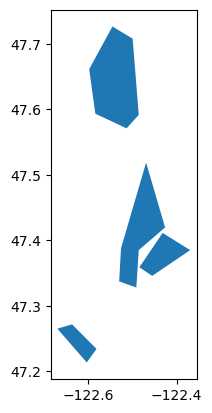

In [2]:
# Build Region of Interest
region = sliderule.toregion('seattle_islands.geojson')
region["gdf"].plot()

In [4]:
# Build ATL06 Request Parameters
parms = {
    "poly": region["poly"],
    "raster": region["raster"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
}

# Make ATL06 Request
atl06 = icesat2.atl06p(parms)

In [5]:
atl06.head()

,w_surface_window_final,pflags,spot,segment_id,dh_fit_dy,rms_misfit,gt,cycle,h_sigma,dh_fit_dx,h_mean,rgt,n_fit_photons,distance,geometry
time,,,,,,,,,,,,,,,
2018-12-02 09:32:49.250595584,3.0,0,2,736883,0.0,0.145955,50,1,0.067158,-0.009010,-21.727716,989,10,1.475870e+07,POINT (-122.53502 47.71981)
2018-12-02 09:32:49.252002816,3.0,0,2,736883,0.0,0.112897,50,1,0.023056,0.008101,-21.735464,989,27,1.475871e+07,POINT (-122.53503 47.71972)
2018-12-02 09:32:49.253414912,3.0,0,2,736884,0.0,0.078823,50,1,0.016528,0.004892,-21.670659,989,25,1.475872e+07,POINT (-122.53504 47.71963)
2018-12-02 09:32:49.254822656,3.0,0,2,736884,0.0,0.105347,50,1,0.025377,-0.006442,-21.659128,989,31,1.475873e+07,POINT (-122.53505 47.71954)
2018-12-02 09:32:49.256233984,3.0,0,2,736885,0.0,0.103912,50,1,0.015399,-0.003931,-21.713293,989,46,1.475874e+07,POINT (-122.53507 47.71945)


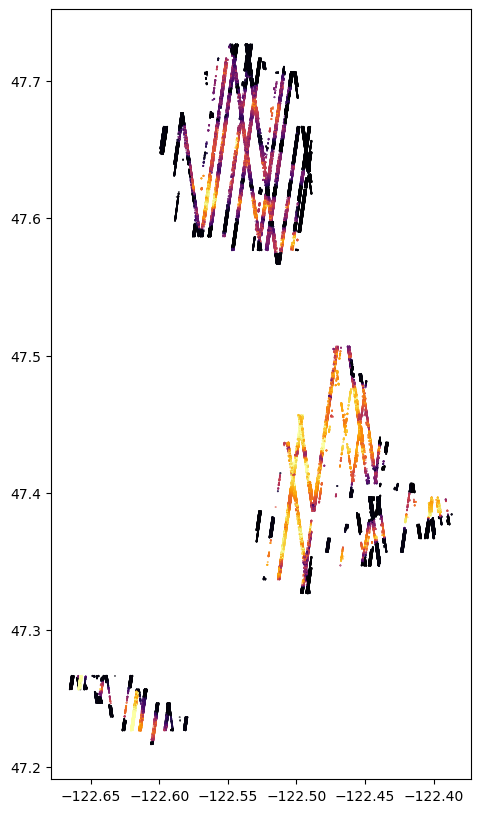

In [6]:
# Plot the region polygon
import matplotlib.pyplot as plt
vmin, vmax = atl06['h_mean'].quantile((0.02, 0.98))
plot_kw = {'cmap':'inferno', 's':0.1, 'vmin':vmin, 'vmax':vmax}
f, ax = plt.subplots(1,1, figsize=(10,10))
atl06.plot(ax=ax, column='h_mean', **plot_kw)
ax.set_aspect('equal')